<img src="img/TS_ARIMA1.png"/>

<div class="alert alert-block alert-success">
    <b>Problem Statement:</b> Forecasting of macroeconomic indicators is a challenging task, compounded by
complex processes and dynamic nature of the macroeconomy. In this case study , we will showcase how we can use standard Box-jenkins methodology to generate forecast for one key macroeconomic indicator - CPI or Consumer Price Index Inflation
</div>

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Download/import the relevant packages</span></b>
</div>

In [1]:
# Import relevent dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tsfresh
import statsmodels

In [2]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Load the data</span></b>
</div>

In [3]:
pd.set_option('display.max_columns', 10)

In [4]:
data_path = '/Users/shovonsengupta/Desktop/All/EC-Council Course/AI_for_Finance/Section_6_Statistical_Analysis_of_Financial_Time_Series_Data/dataset'

In [5]:
base_series = pd.read_csv(data_path+'/CPI_series_Inflation.csv')

In [6]:
base_series.head()

,Year,CPI_combined,CPI_Headline_Inflation,Date_n
0,02-Jan,48.725055,5.585586,01/01/02
1,02-Feb,48.641907,5.595668,02/01/02
2,02-Mar,48.974501,5.745063,03/01/02
3,02-Apr,49.223947,5.525847,04/01/02
4,02-May,49.556541,5.486726,05/01/02


In [7]:
# Convert object date_n to datetime[64]
import pandas as pd
base_series['date']= pd.to_datetime(base_series['Date_n'])

In [8]:
base_series.dtypes

Year                              object
CPI_combined                     float64
CPI_Headline_Inflation           float64
Date_n                            object
date                      datetime64[ns]
dtype: object

In [9]:
# Creating the series with only relevent information
base_series_new=base_series[['date','CPI_Headline_Inflation']]
base_series_new.reset_index(drop=True)
base_series_new.head()

,date,CPI_Headline_Inflation
0,2002-01-01,5.585586
1,2002-02-01,5.595668
2,2002-03-01,5.745063
3,2002-04-01,5.525847
4,2002-05-01,5.486726


In [10]:
base_series = base_series_new.set_index('date')
base_series.index

DatetimeIndex(['2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

In [11]:
# Create the Series
y = base_series['CPI_Headline_Inflation'].resample('MS').mean()
y['2018':]

date
2018-01-01    5.065234
2018-02-01    4.441041
2018-03-01    4.278075
2018-04-01    4.576659
2018-05-01    4.870624
2018-06-01    4.924242
2018-07-01    4.172876
2018-08-01    3.692762
2018-09-01    3.772189
2018-10-01    3.379868
2018-11-01    2.325581
2018-12-01    2.186589
Freq: MS, Name: CPI_Headline_Inflation, dtype: float64

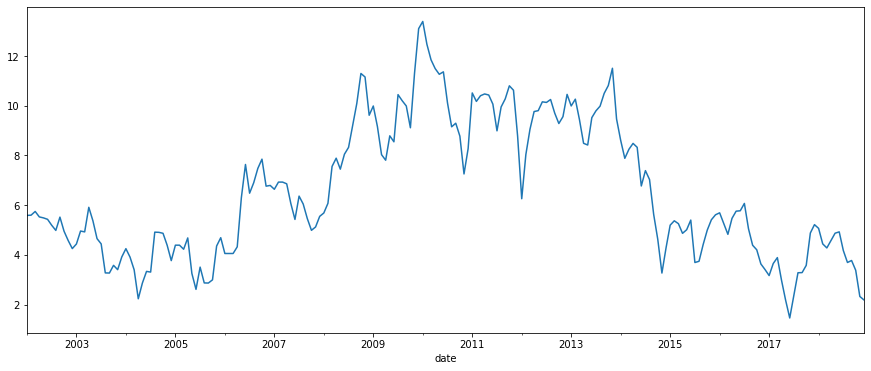

In [12]:
# Visualizing Inflation Time Series Data
y.plot(figsize=(15, 6))
plt.show()

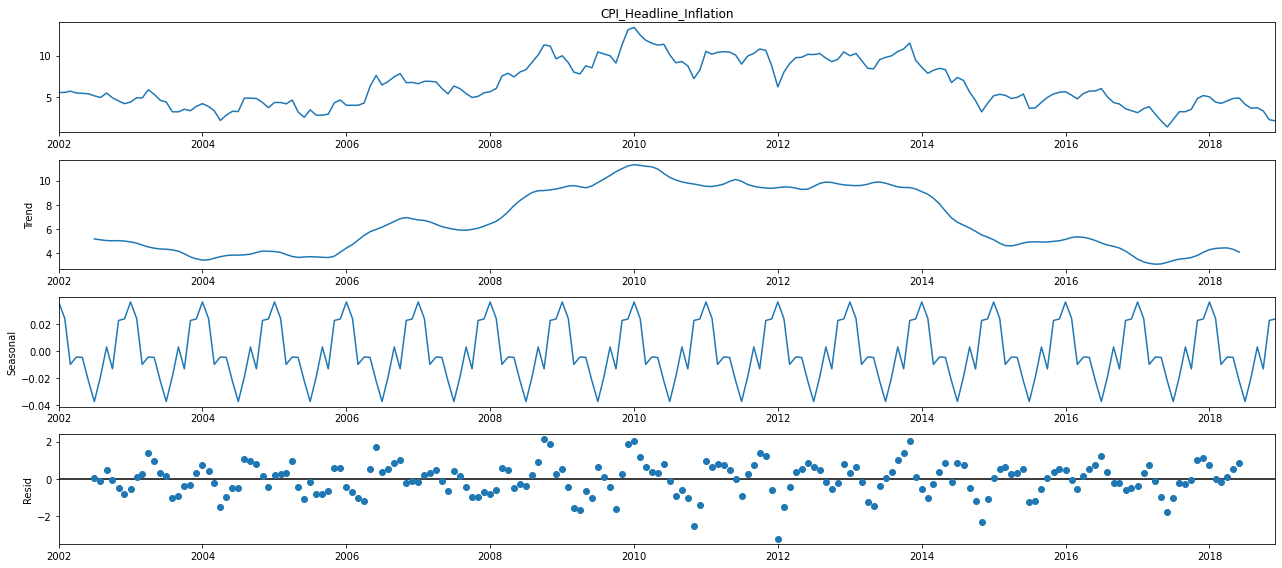

In [13]:
# Check for various component of the Time Series
import statsmodels as sm
from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition_add = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition_add.plot()
plt.show()

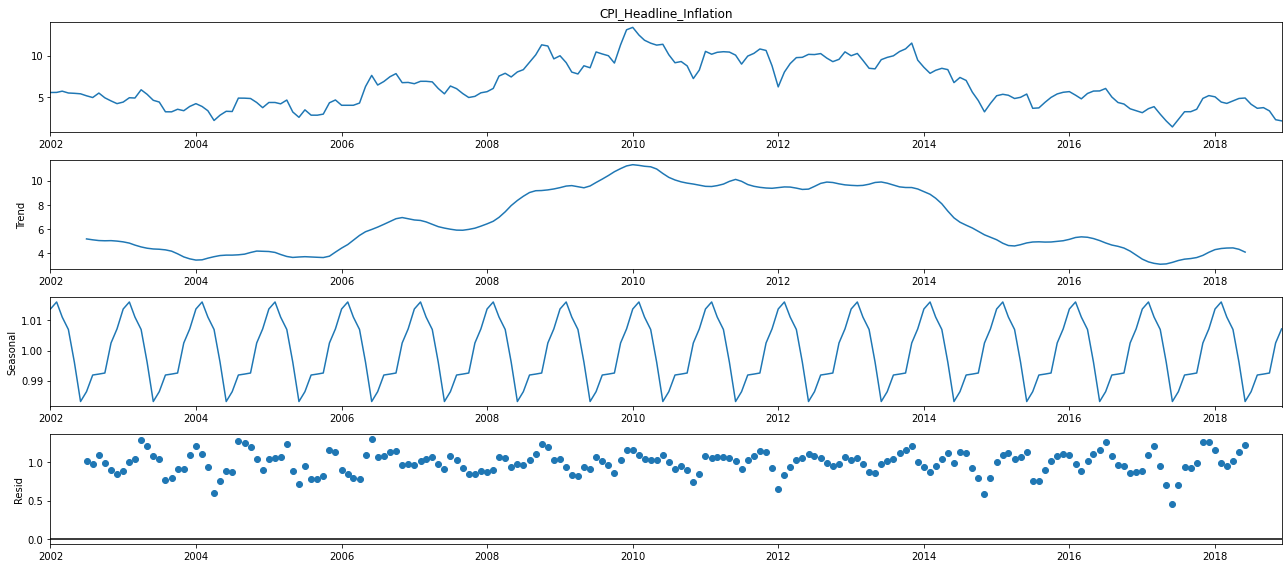

In [14]:
# Check for multiplicative trend
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition_mul = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition_mul.plot()
plt.show()

In [15]:
# A Quick check of stationarity
#Run ADF test on the original time series
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal
adf_result = stattools.adfuller(base_series['CPI_Headline_Inflation'], autolag='AIC')
print('p-val of the ADF test on irregular variations in CPI series data:', adf_result[1])

p-val of the ADF test on irregular variations in CPI series data: 0.8100920142967412


In [16]:
#Run ADF test on the irregular variations - Multiplicative Model
adf_result = stattools.adfuller(decomposition_add.resid[np.where(np.isfinite(decomposition_add.resid))[0]],
                                autolag='AIC')
print('p-val of the ADF test on irregular variations in CPI Data:', adf_result[1])

p-val of the ADF test on irregular variations in CPI Data: 3.3339168632454646e-08


In [17]:
#Run ADF test on the irregular variations - Multiplicative Model
adf_result = stattools.adfuller(decomposition_mul.resid[np.where(np.isfinite(decomposition_mul.resid))[0]],
                                autolag='AIC')
print('p-val of the ADF test on irregular variations in CPI Data:', adf_result[1])

p-val of the ADF test on irregular variations in CPI Data: 7.405904805471186e-08


__Differencing - Basic check for Stationarity__

In [18]:
# First Order Differencing
first_order_diff = base_series['CPI_Headline_Inflation'].diff(1)

Text(0.5, 1.0, 'First-order differences of CPI data - 2000 to 2018')

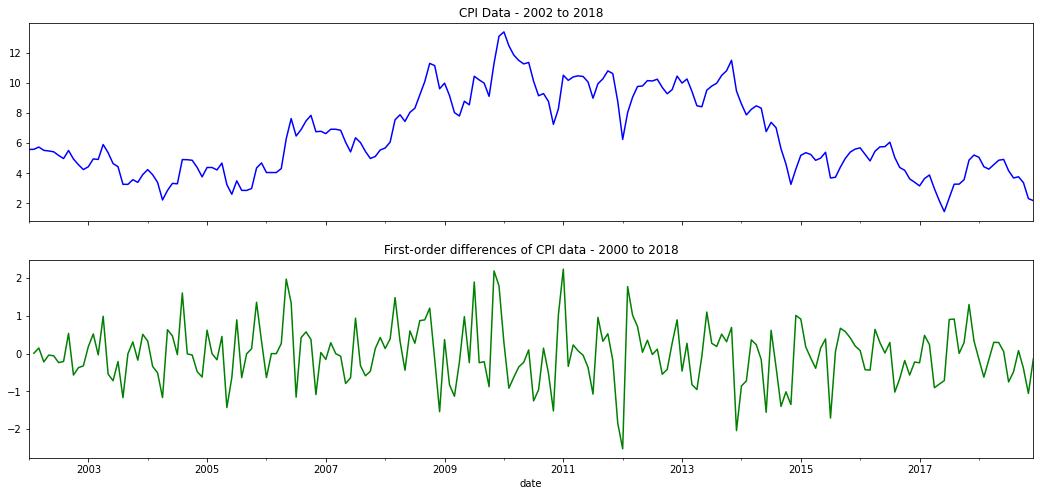

In [19]:
#Let us plot the original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
base_series['CPI_Headline_Inflation'].plot(ax=ax[0], color='b')
ax[0].set_title('CPI Data - 2002 to 2018')
first_order_diff.plot(ax=ax[1], color='g')
ax[1].set_title('First-order differences of CPI data - 2000 to 2018')

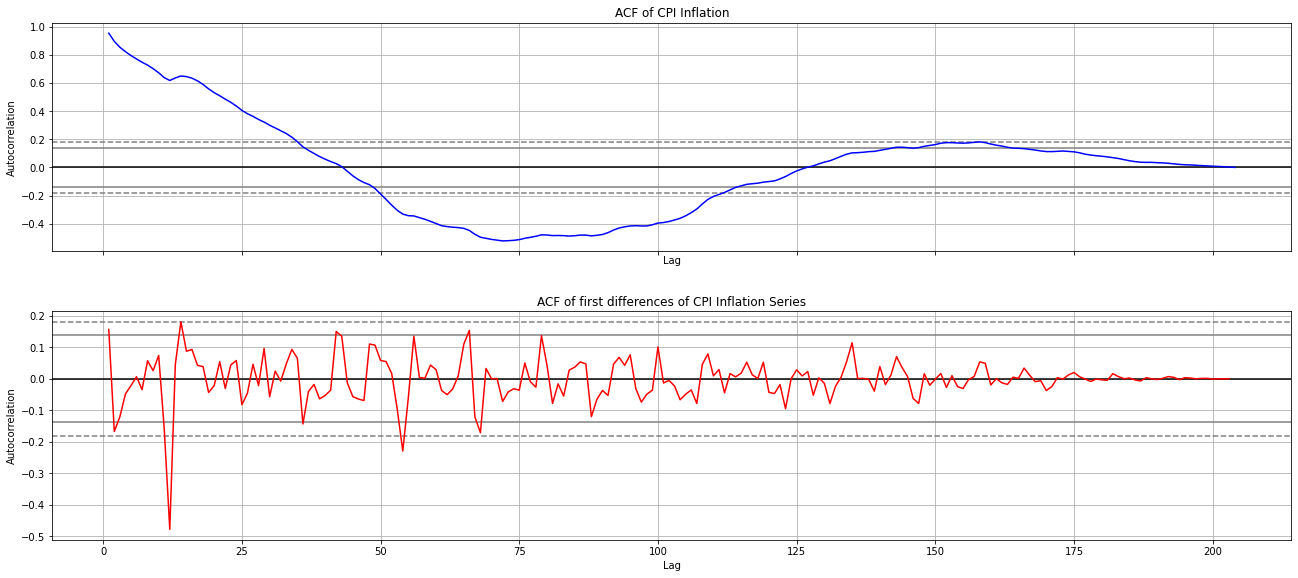

In [20]:
#Let us plot the ACFs of original time series and first-differences
from pandas.plotting import autocorrelation_plot
fig, ax = plt.subplots(2, sharex=True)
autocorrelation_plot(base_series['CPI_Headline_Inflation'], color='b', ax=ax[0])
ax[0].set_title('ACF of CPI Inflation')
autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of CPI Inflation Series')
plt.tight_layout(pad=0.6, w_pad=0.6, h_pad=3.0)

In [21]:
'''Now we could perform the Ljung-Box test on the ACFs of the original time series and the first-differences. For running the test we can limit upto specified Lags'''

'Now we could perform the Ljung-Box test on the ACFs of the original time series and the first-differences. For running the test we can limit upto specified Lags'

In [22]:
# Basic Test for stationarity
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print('Results of dickey fuller test')
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics',
                                        'p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)

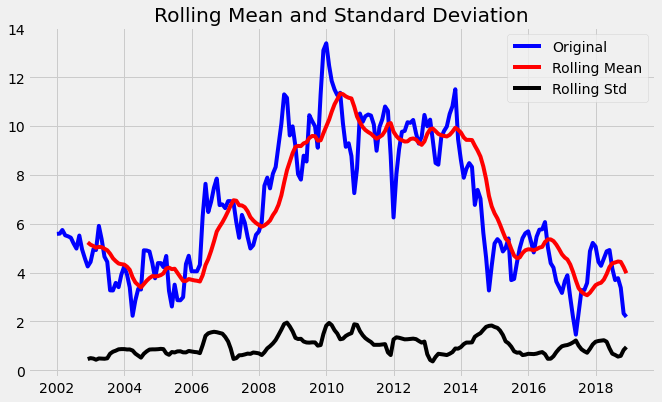

Results of dickey fuller test
Test Statistics                 -0.830192
p-value                          0.810092
No. of lags used                13.000000
Number of observations used    190.000000
critical value (1%)             -3.465244
critical value (5%)             -2.876875
critical value (10%)            -2.574945
dtype: float64


In [23]:
test_stationarity(base_series['CPI_Headline_Inflation'])

In [24]:
'''The statistics shows that the time series is non-stationary as Test Statistic > Critical value, the p-value is greater than 5%, and we can see an increasing trend in the data. So, firstly we will try to make the data stationary. For doing so, we need to remove the trend and seasonality from the data.'''

'The statistics shows that the time series is non-stationary as Test Statistic > Critical value, the p-value is greater than 5%, and we can see an increasing trend in the data. So, firstly we will try to make the data stationary. For doing so, we need to remove the trend and seasonality from the data.'

__Making the time series stationary__

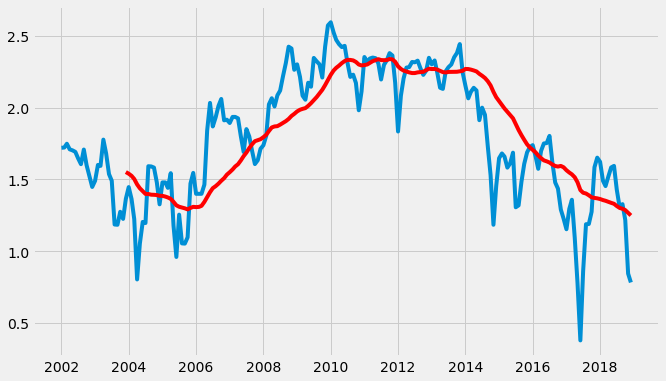

In [25]:
# train_log = np.log(train_cpi) 
# test_log = np.log(test_cpi)
# base_series['CPI_Headline_Inflation']
base_log = np.log(base_series['CPI_Headline_Inflation'])
# moving_avg = train_log.rolling(24).mean() 
moving_avg = base_log.rolling(24).mean() 
plt.plot(base_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

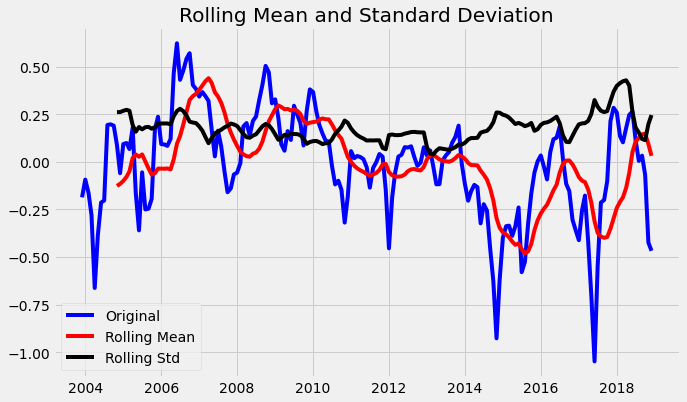

Results of dickey fuller test
Test Statistics                 -1.906796
p-value                          0.328871
No. of lags used                12.000000
Number of observations used    168.000000
critical value (1%)             -3.469886
critical value (5%)             -2.878903
critical value (10%)            -2.576027
dtype: float64


In [26]:
base_log_moving_avg_diff = base_log - moving_avg
base_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(base_log_moving_avg_diff)

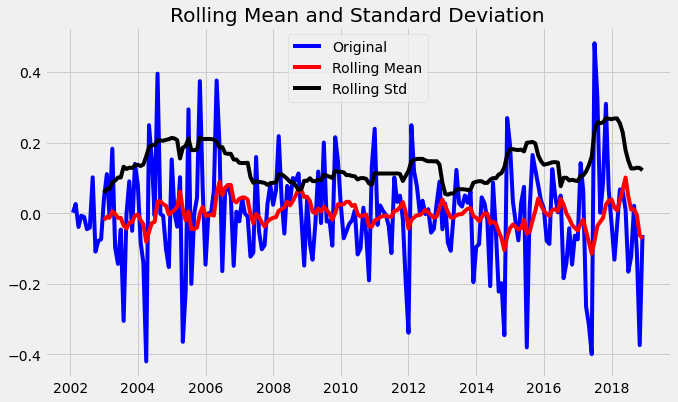

Results of dickey fuller test
Test Statistics                 -5.468807
p-value                          0.000002
No. of lags used                12.000000
Number of observations used    190.000000
critical value (1%)             -3.465244
critical value (5%)             -2.876875
critical value (10%)            -2.574945
dtype: float64


In [27]:
base_log_diff = base_log - base_log.shift(1) 
test_stationarity(base_log_diff.dropna())

In [28]:
'''Differencing can help to make the series stable and eliminate the trend.'''

'Differencing can help to make the series stable and eliminate the trend.'

___Building the ARIMA Model___

In [29]:
base_series.index = pd.to_datetime(base_series.index)

In [30]:
base_series.columns = ['CPI_Headline_Inflation']

In [31]:
base_series.head()

,CPI_Headline_Inflation
date,
2002-01-01,5.585586
2002-02-01,5.595668
2002-03-01,5.745063
2002-04-01,5.525847
2002-05-01,5.486726


In [32]:
# We will be using pmdarima package
import pmdarima
print(pmdarima.__version__)

1.6.1


In [33]:
# Grid-Search and Cross Validation 
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(base_series, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=487.499, BIC=503.760, Time=1.094 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=661.615, BIC=668.120, Time=0.018 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=544.638, BIC=557.647, Time=0.218 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=487.048, BIC=500.057, Time=0.773 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=659.625, BIC=662.878, Time=0.016 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=656.039, BIC=669.048, Time=0.085 seconds
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=449.523, BIC=469.037, Time=1.071 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
F

In [34]:
stepwise_model.aic()

428.66612471249573

In [35]:
# Train-Test Split
train_cpi = base_series.loc['2002-01-01':'2018-06-01']
test_cpi = base_series.loc['2018-07-01':]

In [36]:
train_cpi.tail()

,CPI_Headline_Inflation
date,
2018-02-01,4.441041
2018-03-01,4.278075
2018-04-01,4.576659
2018-05-01,4.870624
2018-06-01,4.924242


In [37]:
test_cpi.head()

,CPI_Headline_Inflation
date,
2018-07-01,4.172876
2018-08-01,3.692762
2018-09-01,3.772189
2018-10-01,3.379868
2018-11-01,2.325581


__Test for Stationarity & Seasonality__

In [38]:
# Conducting PP test:
test = pmdarima.arima.PPTest() # You can choose alpha here, default = 0.05
test.should_diff(base_series['CPI_Headline_Inflation'])
# view raw

(0.7357691261468359, True)

In [39]:
'''PP stands for Phillips-Perron test. In some cases, I in ARIMA which stands for Integral is needed. Differencing of I=1 or 2 mostly does the job. This PP test is a unit root test to confirm that the time series is integrated of order 1. This is also an alternative to the ADF test if want to check stationarity.'''

'PP stands for Phillips-Perron test. In some cases, I in ARIMA which stands for Integral is needed. Differencing of I=1 or 2 mostly does the job. This PP test is a unit root test to confirm that the time series is integrated of order 1. This is also an alternative to the ADF test if want to check stationarity.'

In [40]:
# Loading the packages
import pandas as pd
import pmdarima
# Conducting CH test:
results = pmdarima.arima.CHTest(m=12).estimate_seasonal_differencing_term(base_series['CPI_Headline_Inflation'])
results

0

In [41]:
'''The Canova Hansen(CH) test is mainly used to test for seasonal differences and to validate that the null hypothesis that the seasonal pattern is stable over a sample period or it is changing across time. This is mostly helpful in economic or meteorological data[5]. This is already implemented in Python within pmdarima library.
'''

'The Canova Hansen(CH) test is mainly used to test for seasonal differences and to validate that the null hypothesis that the seasonal pattern is stable over a sample period or it is changing across time. This is mostly helpful in economic or meteorological data[5]. This is already implemented in Python within pmdarima library.\n'

In [42]:
# Loading the packages
import pandas as pd
import pmdarima
# Conducting OCSB test:
results = pmdarima.arima.OCSBTest(m=12).estimate_seasonal_differencing_term(base_series['CPI_Headline_Inflation'])
results

0

In [43]:
'''Osborn, Chui, Smith, and Birchenhall (OCSB) test is used to determine if the data needs seasonal differencing (D component of P,D,Q,m). pmdarima package has a predefined function that one can leverage'''

'Osborn, Chui, Smith, and Birchenhall (OCSB) test is used to determine if the data needs seasonal differencing (D component of P,D,Q,m). pmdarima package has a predefined function that one can leverage'

__Plotting the ACF/PACF for the time Series__

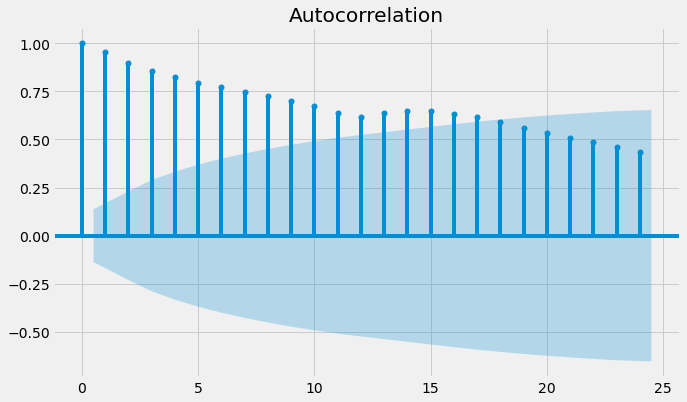

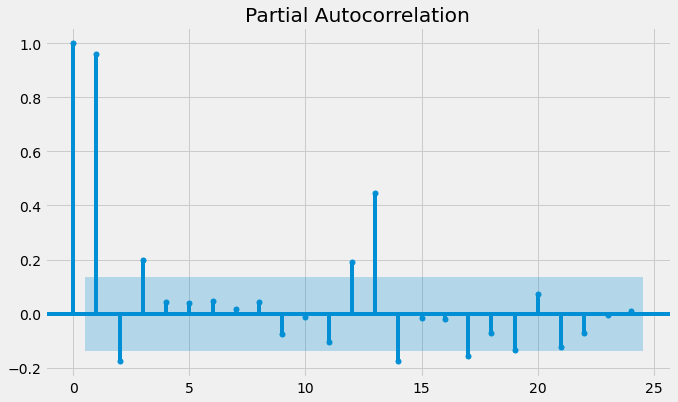

In [44]:
# Loading the packages
import pandas as pd
from statsmodels.graphics import tsaplots
plt.style.use('fivethirtyeight')

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(base_series['CPI_Headline_Inflation'], lags=24)
plt.show()

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(base_series['CPI_Headline_Inflation'], lags=24)
plt.show()

__Fit the model__

In [45]:
# Fit the Model with the Train Data
stepwise_model.fit(train_cpi)

ARIMA(order=(1, 1, 1), seasonal_order=(0, 1, 2, 12), suppress_warnings=True)

In [46]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(train_cpi, 
                                trend='c', 
                                order=(3,1,1),
                                seasonal_order=(2, 1, 1, 12))
res = mod.fit(disp=-1)
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:             CPI_Headline_Inflation   No. Observations:                  198
Model:             SARIMAX(3, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -209.053
Date:                            Sat, 20 Mar 2021   AIC                            436.107
Time:                                    18:29:23   BIC                            465.090
Sample:                                01-01-2002   HQIC                           447.853
                                     - 06-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0301      0.023     -1.307      0.191      -0.075       0.015
ar.L1         -0.6313      0.174   

In [47]:
# Calculating MAPE for the last 6 Month's data
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [48]:
forecasts = pd.DataFrame(res.forecast(steps=6))
forecasts.columns = ['Forecast']
forecasts

,Forecast
2018-07-01,4.252234
2018-08-01,3.799261
2018-09-01,3.827672
2018-10-01,3.512421
2018-11-01,2.804745
2018-12-01,2.496286


In [49]:
pred = pd.concat([test_cpi,forecasts],axis=1)
pred.head()

,CPI_Headline_Inflation,Forecast
2018-07-01,4.172876,4.252234
2018-08-01,3.692762,3.799261
2018-09-01,3.772189,3.827672
2018-10-01,3.379868,3.512421
2018-11-01,2.325581,2.804745


In [50]:
mean_absolute_percentage_error(pred['CPI_Headline_Inflation'],pred['Forecast'])

7.490984006810028

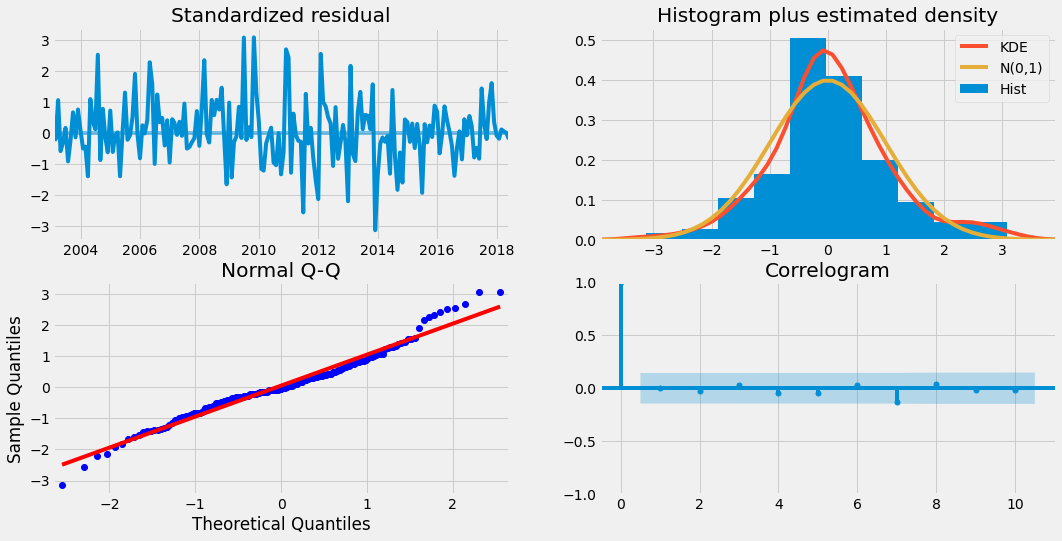

In [51]:
# Check the Model Diagnostics
res.plot_diagnostics(figsize=(16, 8))
plt.show()

The top-right plot shows the kernel density estimate (KDE) of the standardized residuals, which suggests the errors are Gaussian with a mean close to zero. Let's see a more accurate statistic of the residuals:

In [53]:
res.resid.describe()

count    198.000000
mean       0.052416
std        0.842602
min       -2.593148
25%       -0.332219
50%       -0.047770
75%        0.394599
max        5.595242
dtype: float64

From the description of the residuals, the zero mean suggests that the predictions are not biased and the model have exploited all the relevant information

__congratulations!__